# Uruguayan media press analysis


## Step 0. Load libraries, custom modules and data


In [61]:
!pip install textpreprocessing 
!pip install clean_stopwords
!pip install langdetect
!pip install --upgrade spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement clean_stopwords (from versions: none)
ERROR: No matching distribution found for clean_stopwords
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
# Dataframes and matrices -------------------
import pandas as pd
import numpy as np
import os
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.express as px
import plotly.io as pio
# Text processors ------------------------------------------------------
import unicodedata
from unicodedata import normalize
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
# Custom functions -----------------------------------------------------
#from textpreprocessing import clean_stopwords ojo que en colab quizás no sea necesario
nltk.download('stopwords')
nltk.download('punkt')
import spacy
!python -m spacy download es_core_news_sm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2022-09-07 13:13:22.564463: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 4.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [63]:
df_raw=pd.read_csv('https://raw.githubusercontent.com/abaron32/bases_construidas/main/noticias_uy_twitter.csv', index_col=0)

## Step 1: EDA

In [64]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112237 entries, 3168 to 131673
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      112237 non-null  int64 
 1   text    112237 non-null  object
 2   date    112237 non-null  object
 3   medio   112237 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.3+ MB


In [65]:
df_raw.reset_index(inplace=True,drop=True)

In [66]:
pd.set_option('display.max_colwidth', None) #set options pandas

In [67]:
df_raw.sample(10)

,id,text,date,medio
72889,1542940685741039616,"El MEF informó que los efectos imputados al Fondo Solidario covid-19 se estimaron en 1,2% del PIB en los 12 meses a mayo (0,1 punto menos que en los 12 meses a abril).\n https://t.co/RE92vc8Yp1",2022-07-01 18:38:20+00:00,el_pais
102920,1535177446948884480,"Twitter accederá a la petición de Elon Musk de proporcionar datos internos, como parte de un enfrentamiento en el que está en juego la cuestionada oferta de US$ 44.000 millones del magnate para comprar la plataforma. \n\nhttps://t.co/w55EbIaEC4",2022-06-10 08:30:00+00:00,telenoche
79017,1550258074035814405,RT @elpaisuyopinion: ¡Cerrá y vamos!\n\nPor Ricardo Reilly Salaverri\n\nhttps://t.co/xbb8Z5cgCm https://t.co/CYTxYjYojB,2022-07-21 23:15:01+00:00,el_pais
15704,1538257465187385344,Pablo Martinis: “No sé cómo se piensa construir una transformación educativa a la vez que se está yendo agresivamente contra los docentes organizados”. #LaDiariaEducación https://t.co/5e3ajFUiBU,2022-06-18 20:28:53+00:00,la_diaria
5858,1552317081051402240,El ministro @luisaheber participó en aniversario de la Dirección Nacional de Políticas de Género | Informa @dleonjoaquin https://t.co/r3oA8z7oSR,2022-07-27 15:36:47+00:00,cinco
57301,1521930694355820546,Vida Actual | Así es RoboPing: el robot diseñado por un campeón y con el que jugó el presidente https://t.co/Wo9uZTlKYo https://t.co/LGqziX2qFd,2022-05-04 19:12:08+00:00,el_pais
89633,1510356283311939590,"Evitar demostraciones de afecto, maldecir o hacer gestos groseros en el estadio, son algunas de las recomendaciones que aparecen en el documento. Agrega además que está prohibido usar bikini o tomar alcohol en lugares públicos. https://t.co/ab2rhdCL9t",2022-04-02 20:39:33+00:00,subrayado
104162,1540096552231895042,"La Asamblea Permanente por la Rambla Sur indicó que la instalación de un puerto en el área del Dique Mauá es inconveniente ""debido a los negativos efectos ambientales, sociales, paisajísticos y circulatorios que impactarán sobre el terreno"". https://t.co/4zflcQahS2",2022-06-23 22:16:46+00:00,telenoche
96722,1508526474445402127,Las autoridades anunciaron la noche del domingo un confinamiento en dos fases en la ciudad de 25 millones de habitantes para realizar pruebas masivas. https://t.co/6MJmsQu3ky,2022-03-28 19:28:33+00:00,telenoche
83906,1556403832396992512,El intendente de Maldonado dijo que luego de dos años de pandemia ahora la situación recae sobre unos 2000 trabajadores. https://t.co/G0JsE1NSRE,2022-08-07 22:16:04+00:00,el_pais


In [68]:
# Check duplicates

data_duplicates = df_raw['id'].duplicated().sum()

print(f'There are {data_duplicates} duplicated tweets in the dataset according to the feature id.')

There are 0 duplicated tweets in the dataset according to the feature id.


In [69]:
df_interim=df_raw.copy()

In [70]:
# Change data type of date and medio and drop id

df_interim['date']=df_interim['date'].astype('datetime64')
df_interim['medio']=df_interim['medio'].astype('category')
df_interim.drop(columns='id',axis=1,inplace=True)

In [71]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112237 entries, 0 to 112236
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   text    112237 non-null  object        
 1   date    112237 non-null  datetime64[ns]
 2   medio   112237 non-null  category      
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 1.8+ MB


In [72]:
df_interim.describe(datetime_is_numeric=True) # tweets from 22/03/22 to 25/08/22 per seconds

,date
count,112237
mean,2022-06-08 02:28:07.117884928
min,2022-03-22 00:00:06
25%,2022-04-29 12:29:03
50%,2022-06-07 15:42:12
75%,2022-07-18 22:35:41
max,2022-08-25 15:09:31


There are 112237 tweets from 22/3/22 to 25/8/22 

In [73]:
# Count of tweets per medio

pio.templates.default = "plotly_white" # template for plotly express plots

fig = px.histogram(df_interim, x="medio",title="Number of tweets per medio", width=800, height=400, color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [74]:
# Count total tweets per day

df_numb_tweets=(df_interim
        .assign(date_aux=df_interim['date'].dt.strftime('%m/%d'))
        .groupby(['date_aux'])
        .agg(count=('date_aux','count'))
        .reset_index())
df_numb_tweets

,date_aux,count
0,03/22,874
1,03/23,836
2,03/24,865
3,03/25,863
4,03/26,563
...,...,...
152,08/21,461
153,08/22,780
154,08/23,754
155,08/24,776


In [75]:
fig = px.line(df_numb_tweets, x='date_aux', y="count",title="Number of tweets per day", width=800, height=400, color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [76]:
# Make a plot of tweets frequence rate by hour and medio
df_plot=(df_interim
        .assign(hour=df_interim['date'].dt.hour)
        .groupby(['medio','hour'])
        .agg(count=('medio','count'))
        .assign(rate=lambda df_interim: df_interim['count']/df_interim.groupby('medio')['count'].sum())
        .reset_index())
df_plot

,medio,hour,count,rate
0,busqueda,0,20,0.015785
1,busqueda,1,1,0.000789
2,busqueda,2,0,0.000000
3,busqueda,3,0,0.000000
4,busqueda,4,0,0.000000
...,...,...,...,...
211,uypress,19,46,0.018437
212,uypress,20,74,0.029659
213,uypress,21,106,0.042485
214,uypress,22,135,0.054108


In [77]:
fig = px.line(df_plot, x="hour", y="rate", color='medio', title='Frequency of tweets per media by hour', width=800, height=400, color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

There are some hours where it seems that some media have scheduled posts. Although there are others who post throughout the day at a similar rate. 

In [78]:
# Make a plot of tweets frequence rate by day of week and medio
df_plot_day=(df_interim
        .assign(day=df_interim['date'].dt.day_of_week)
        .groupby(['medio','day'])
        .agg(count=('medio','count'))
        .assign(rate=lambda df_interim: df_interim['count']/df_interim.groupby('medio')['count'].sum())
        .reset_index())

df_plot_day

,medio,day,count,rate
0,busqueda,0,194,0.153118
1,busqueda,1,204,0.161010
2,busqueda,2,36,0.028414
3,busqueda,3,321,0.253354
4,busqueda,4,199,0.157064
...,...,...,...,...
58,uypress,2,425,0.170341
59,uypress,3,431,0.172745
60,uypress,4,425,0.170341
61,uypress,5,325,0.130261


In [79]:
fig = px.line(df_plot_day, x="day", y="rate", color='medio', title='Frequency of tweets per media by day', width=800, height=400, color_discrete_sequence=px.colors.qualitative.Dark24)

# 0 corresponds to Monday

fig.show()

## Step 2: Preprocessing

First we created an indicative column if the text refered to a reweet or not.

In [80]:
indexrtw=[index for index,n in enumerate(list(df_interim['text'])) if n.startswith('RT')]

In [81]:
df_interim['Is_Retweet']=np.repeat(0,df_interim.shape[0])
for i,row in df_interim.iterrows():
    if i in indexrtw :
        df_interim.loc[i,'Is_Retweet']=1
        

In [82]:
df_interim[df_interim['Is_Retweet']==1]

,text,date,medio,Is_Retweet
2,"RT @BUSQUEDAonline: Repunta el gasto en viajes al exterior y en traslados internos\ncontratados por el Estado, que rondó los US$ 8 millones…",2022-03-22 18:35:48,busqueda,1
3,RT @BusquedaVivo: 🎧Volvé a escuchar:\n\n🎙️ @ssanchez1986\nhttps://t.co/zRe4sI8os2,2022-03-22 19:00:38,busqueda,1
4,RT @BusquedaVivo: 🎧Volvé a escuchar:\n\n🎙️ @SofiaHargui sobre inflación https://t.co/0OXezbjJHd,2022-03-22 19:01:08,busqueda,1
5,RT @BUSQUEDAonline: La razón de los indecisos\n\n🖌 @danzaandres \n\n🔗https://t.co/wfwV6046Ld\n\n🔓 https://t.co/xaeSmqdeyi,2022-03-22 20:06:16,busqueda,1
6,"RT @BusquedaVivo: Se viene un martes a pura cultura. Nos acompañan @jalfo09 periodista de la casa, y el rock de guitarras y pop con aires d…",2022-03-22 20:12:03,busqueda,1
...,...,...,...,...
109027,"RT @Canal4_UY: Te dejamos un adelanto de @TelenocheUy de la mano de @dcastro65 🗞 ¡Prendete a nuestra pantalla, ponete en #ModoNoticias y no…",2022-08-17 21:53:58,telenoche,1
109029,RT @Canal4_UY: Comenzó @TelenocheUy y estos son los títulos:\n\n✅Diferencias abismales en precios entre Salto y Concordia \n✅Mantendrán abiert…,2022-08-17 22:10:18,telenoche,1
109461,RT @Canal4_UY: ¿Ya estás en #ModoNoticias? Te dejamos un adelanto de la edición central de @TelenocheUy 🗞 Ahora por nuestra pantalla 📺 http…,2022-08-22 21:56:13,telenoche,1
110347,"RT @uypress: AEBU: Elecciones provocan cambio en la conducción de Banca Oficial, donde ganó la agrupación 98 https://t.co/HQI6UnnxrT https:…",2022-05-01 11:01:27,uypress,1


Second, we drop all the emojis and emoticons

In [83]:
# remove emojis and emoticons 
# https://www.kaggle.com/code/knitvikas/text-preprocessing
# https://unicode.org/emoji/charts/full-emoji-list.html add some more like the ball and arrow

def clean_emojis(txt):
  print(txt) # with emoji
  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002500-\U00002BEF"  # chinese char
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642" 
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
                              "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', txt)

In [84]:
df_interim["text_clean"] = df_interim.text.apply(clean_emojis)

Se han truncado las últimas 5000 líneas del flujo de salida.
Lula da Silva defendió el estado laico y rechazó el uso de la Iglesia como "escenario político", en un acto de campaña en Sao Paulo, a 43 días de las elecciones en las que busca volver a la presidencia.

https://t.co/eJAKH2MTvU
El alcalde de la ciudad manifestó su indignación y bronca en sus redes sociales por la situación.

https://t.co/adUeTEK6ll
La pandemia duplicó a 16 millones la cifra de personas en inseguridad alimentaria y sin acceso a una dieta saludable en Perú.

https://t.co/M3eCUjzZcl
La Jutep procesa cada dos años unas 12 mil declaraciones juradas y debe jugar un rol clave en el combate a la corrupción en Uruguay.

https://t.co/OOPou3keAI
Groenlandia lidia con la llegada cada vez más importante de turistas, atraídos por los paisajes grandiosos de esta isla cubierta de hielo y rodeada de icebergs que convive bajo la amenaza del cambio climático.

https://t.co/4HVlpXDJaO
En el video se puede observar como la perra,

Third, we drop all the mentions before of droping the symbols because it is easyer to detect it with the '@'.

In [85]:
# Function to get mentions
def get_mention(txt):
    mention = []
    for i in txt.split(" "):
        if len(i) > 0 and i[0] == "@":
            mention.append(i)
    return "".join([mention[i] + ", " if i != len(mention) - 1 else mention[i] for i in range(len(mention))])          

In [86]:
# Function to clean the mentions

def clean_mention(txt): 
    try: 
        word_split = txt.split(" ")
        filtered_word = [w for w in word_split if not w.startswith('@')] 
        filtered_word = [w + " " for w in filtered_word]
        return "".join(filtered_word)
    except:
        return np.nan    

In [87]:
df_interim["mentions"] = df_interim.text_clean.apply(get_mention)

In [88]:
df_interim["text_clean"] = df_interim.text_clean.apply(clean_mention)

Next, we drop all the urls.

In [89]:
# Drop all the url
def clean_http(txt): 
    try: 
        word_tokens = txt.split()
        filtered_word = [w for w in word_tokens if not w.startswith('http')] 
        filtered_word = [w + " " for w in filtered_word]
        return "".join(filtered_word)
    except:
        return np.nan 

In [90]:
df_interim["text_clean"] = df_interim.text_clean.apply(clean_http)

In [91]:
df_interim.sample(50)

,text,date,medio,Is_Retweet,text_clean,mentions
13640,Esteban Rodríguez Alzueta: “La violencia llega cuando la política se queda sin palabras” e “impotente” #LaDiariaJusticia https://t.co/FibJfM6KSI,2022-05-29 15:46:31,la_diaria,0,Esteban Rodríguez Alzueta: “La violencia llega cuando la política se queda sin palabras” e “impotente” #LaDiariaJusticia,
27555,"🗣️María Eugenia Estoup: ""venimos reclamando que nos llamen a discutir por reestructura"". https://t.co/ZguWlSo4XX",2022-06-28 23:05:56,mvd,0,"María Eugenia Estoup: ""venimos reclamando que nos llamen a discutir por reestructura"".",
13573,Tribunal de Apelaciones falló a favor de Marta Jara y el Estado deberá pagarle 175.000 dólares #LaDiariaJusticia https://t.co/mChP6LUg0U,2022-05-28 17:21:10,la_diaria,0,Tribunal de Apelaciones falló a favor de Marta Jara y el Estado deberá pagarle 175.000 dólares #LaDiariaJusticia,
108727,El principal delito al que se dedicaba la secta era la trata de personas con reducción a la servidumbre a través de la coerción.\n\nhttps://t.co/e0hXaq2kes,2022-08-14 11:30:00,telenoche,0,El principal delito al que se dedicaba la secta era la trata de personas con reducción a la servidumbre a través de la coerción.,
111454,"El desafío asiático de la OTAN, ¿hacia un mundo bipolar? https://t.co/dRv83kYrcK https://t.co/1o7EfT62Mx",2022-07-02 13:58:15,uypress,0,"El desafío asiático de la OTAN, ¿hacia un mundo bipolar?",
98115,"Las víctimas son un varón de 14 años de edad y una adolescente de 15, ambos hijos de un hombre de 61 años y una mujer de 48 años quienes en las últimas horas fueron detenidos por la Policía.\n\nhttps://t.co/wlMKTb89dY",2022-04-14 01:30:00,telenoche,0,"Las víctimas son un varón de 14 años de edad y una adolescente de 15, ambos hijos de un hombre de 61 años y una mujer de 48 años quienes en las últimas horas fueron detenidos por la Policía.",
43449,"Yao Cabrera irá a juicio oral en Argentina por ""trata de personas con fines de explotación sexual y laboral"" https://t.co/uj7g8K4oJL",2022-08-23 23:43:11,el_observador,0,"Yao Cabrera irá a juicio oral en Argentina por ""trata de personas con fines de explotación sexual y laboral""",
96480,"José Garchitorena, ministro de la Corte, adelantó que ""en la noche del domingo temprano tendremos los resultados primarios"". https://t.co/TlppF7Stye",2022-03-25 15:49:04,telenoche,0,"José Garchitorena, ministro de la Corte, adelantó que ""en la noche del domingo temprano tendremos los resultados primarios"".",
74820,El postre Chajá fue elegido como una de las 50 mejores tortas del mundo https://t.co/cSyirac1yP https://t.co/7ZEIPhWXpt,2022-07-08 02:18:07,el_pais,0,El postre Chajá fue elegido como una de las 50 mejores tortas del mundo,
56830,Ayer se estrenó este conocido programa en Canal 4 con la conducción de Luis Alberto Carballo; el gerente de programación del canal habla del programa https://t.co/8NPVWxb2up,2022-05-03 14:59:04,el_pais,0,Ayer se estrenó este conocido programa en Canal 4 con la conducción de Luis Alberto Carballo; el gerente de programación del canal habla del programa,


Now we continue seeing which are the most popular words and delete the stopwords.

In [92]:
# Which are the most popular words
df_interim['text_clean'].str.split(expand=True).stack().value_counts()[:10]

de     162804
la      78835
en      68807
el      61254
y       53249
a       46132
que     46046
del     35309
por     24889
los     23871
dtype: int64

Delete 'tildes'

https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l

In [93]:
def normalize_txt(txt):
      try: 
        txt = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1",normalize( "NFD", txt), 0, re.I)
        txt = normalize( 'NFD', txt)
        return txt
      except:
        return np.nan

In [94]:
df_interim.text_clean = df_interim.text_clean.apply(normalize_txt)

The most popular words are prepositions and conectors. This kind of words (stopwords) are meaningless to this investigation, so they are going to be deleted. 

In [95]:
# Process text to extract stopwords
stop_dict=stopwords.words('spanish') # we use spanish dictionary
stop_dict.extend(['ladiariaeducacion','ladiariacultura','ladiariasalud','mvdnoticias','mvdnoticias','hoy','semana','dia','lunes','martes','miercoles','jueves','viernes','sabado','domingo','horas','minutos','enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre','mas','tras','dijo','dos','si','tres','ser','ano'])
print('Top 10 stopwords ',stop_dict[:10])
print('Stopwords are :',len(stop_dict))

Top 10 stopwords  ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']
Stopwords are : 349


https://towardsdatascience.com/nlp-text-preprocessing-steps-tools-and-examples-94c91ce5d30

The text has to be in lowercase beacause the stopwords are in these typography.

In [96]:
df_interim['text_clean']=df_interim.text_clean.str.lower() # to lowercase

In [97]:
# Function to drop the stopwords
def clean_stopw(txt): 
    try: 
        word_tokens = word_tokenize(txt)
        filtered_word = [w for w in word_tokens if not w in stop_dict] 
        filtered_word = [w + " " for w in filtered_word]
        return "".join(filtered_word)
    except:
        return np.nan

In [98]:
df_interim["text_clean"] = df_interim.text_clean.apply(clean_stopw)

In [99]:
df_interim.sample(10)

,text,date,medio,Is_Retweet,text_clean,mentions
47488,Inflación y resultado fiscal tensionarán la política y la economía. https://t.co/PuOIpj8csM,2022-04-02 16:45:04,el_pais,0,inflacion resultado fiscal tensionaran politica economia .,
36402,Fuerte deterioro en los números fiscales de Ancap: rojo trepó a US$ 148 millones en los 12 meses a abril https://t.co/6Xdc7OAFM4,2022-06-06 21:10:00,el_observador,0,fuerte deterioro numeros fiscales ancap : rojo trepo us $ 148 millones 12 meses,
7179,Trabajadores de Casa de Galicia piden a las mutualistas que aumenten el número de personas a contratar #LaDiariaSalud https://t.co/pDcjq6rqnu,2022-03-22 14:18:18,la_diaria,0,trabajadores casa galicia piden mutualistas aumenten numero personas contratar #,
43115,Tres jugadores de Nacional y dos de Peñarol tienen cuatro tarjetas amarillas; si reciben la quinta en la fecha que arranca este viernes quedarán suspendidos pero volverán para el clásico https://t.co/UeiNy3LZI1,2022-08-19 17:17:55,el_observador,0,jugadores nacional peñarol cuatro tarjetas amarillas ; reciben quinta fecha arranca quedaran suspendidos volveran clasico,
40785,El mensaje de Sofía Balbi tras el anuncio de la vuelta de Luis Suárez a Nacional https://t.co/QPTm4pntxe,2022-07-26 21:16:42,el_observador,0,mensaje sofia balbi anuncio vuelta luis suarez nacional,
31891,"El presidente de la Comisión Técnica Mixta, Carlos Albisu, destacó los avances en las obras estratégicas y habló de nuevos proyectos para la zona como extracción de cáñamo. https://t.co/SP4r0H5UCQ",2022-04-01 17:48:54,el_observador,0,"presidente comision tecnica mixta , carlos albisu , destaco avances obras estrategicas hablo nuevos proyectos zona extraccion cañamo .",
37297,"Analistas del canal Globo de Brasil dieron sus pronósticos para el Mundial de Qatar, con Uruguay lejos de los candidatos y con Argentina entre los favoritos https://t.co/pODTAwJQfr",2022-06-17 12:55:10,el_observador,0,"analistas canal globo brasil dieron pronosticos mundial qatar , uruguay lejos candidatos argentina favoritos",
23380,"📡AHORA #EnVivo 🎥\n\n#MVDNoticias Edición Central, somos tu canal de información.\n\n🗣️Conducen: @Tinchorgz y @natalianogues1. \n📝Informes: @JNunezTomas.\n\n📺Canal abierto 6.1\n📲https://t.co/1i14UKmAGm.\n💻https://t.co/Ncx1aT4juP.\n📻@UNIRadioUdelaR.\n\n#MiraLaRealidad https://t.co/ZafXkri2jp",2022-04-13 22:05:24,mvd,0,"ahora # envivo # edicion central , canal informacion . conducen : informes : abierto 6.1 @ uniradioudelar . # miralarealidad","@Tinchorgz, @natalianogues1., @JNunezTomas.\n\nCanal"
54442,Se levantó el paro en el supergás tras reunión tripartita por reclamo salarial https://t.co/02rUyjN7cp,2022-04-25 19:38:05,el_pais,0,levanto paro supergas reunion tripartita reclamo salarial,
80302,Mundo | Régimen militar de Birmania ejecutó a cuatro opositores; son las primeras desde 1988 https://t.co/f8JLDytnii https://t.co/2hfBGpjqfv,2022-07-26 16:56:06,el_pais,0,mundo | regimen militar birmania ejecuto cuatro opositores ; primeras 1988,


In [100]:
df_interim['text_clean'].str.split(expand=True).stack().value_counts()[:10]

,          67862
.          54744
:          25833
#          24443
``         18999
''         18642
|          13950
“          11134
”          11040
uruguay     6959
dtype: int64

Now we drop all the symbols, punctuations and numbers.

In [101]:
def clean_all_symbols(txt):
    txt = txt.replace("...", "")
    txt = txt.replace('''[?&#,;:|?"ü']''','')
    txt = txt.replace('\S*@\S*\s?', "")
    txt = re.sub(r"\brt\b", '',txt)
    #txt = re.sub(r"https:", "", txt)
    #txt = re.sub(r"http", "", txt)
    #txt = re.sub(r"http:\S+", "", txt)
    txt = re.sub(r'[^\w\s]', '', txt)
    txt = txt.replace(r'([a-zA-Z])\1{2,}',r'\1') # elimina caracteres repetidos mas de dos veces
    return txt


In [102]:
df_interim.text_clean = df_interim.text_clean.apply(clean_all_symbols)

In [103]:
df_interim['text_clean']=df_interim['text_clean'].str.replace(r'[\d]+','',regex=True) # eliminamos los digitos (1 o mas de uno)

In [104]:
df_interim['text_clean'].str.split(expand=True).stack().value_counts().head(50)

uruguay         6980
anos            5939
nacional        4819
presidente      4251
gobierno        3933
mundo           3567
pais            3271
montevideo      2682
personas        2662
ahora           2573
politica        2467
argentina       2408
lacalle         2364
partido         2356
ministro        2304
penarol         2292
segun           2217
hombre          2154
luis            2150
nuevo           2076
proyecto        1960
pou             1915
frente          1892
edicion         1884
ucrania         1881
ano             1853
nueva           1836
noticias        1791
primera         1780
uruguayo        1757
primer          1754
mundial         1745
salud           1740
ministerio      1727
via             1724
millones        1716
policia         1608
que             1572
covid           1563
seguridad       1556
vida            1552
dias            1520
trabajo         1506
luego           1472
central         1471
ley             1469
caso            1463
casa         

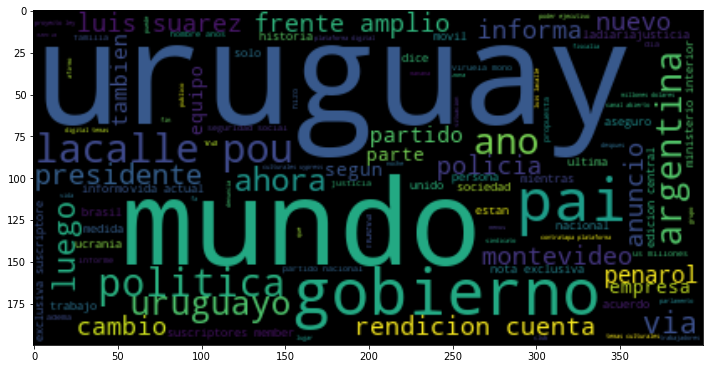

In [105]:
# Let's see a wordcloud
text=' '.join(i for i in df_interim['text_clean'])
wordcloud=WordCloud(max_words=100).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [106]:
df_interim.sample(60)

,text,date,medio,Is_Retweet,text_clean,mentions
11953,"Enamorarse es hablar corto y enredado, de Arnaldo Airaldo, con dirección de Álvaro Correa. https://t.co/t9QBejhecW",2022-05-12 01:15:30,la_diaria,0,enamorarse hablar corto enredado arnaldo airaldo direccion alvaro correa,
108680,"Una abuela argentina se volvió viral al intentar relatar el golazo de Messi, el pasado fin de semana ante Clermont, lo cual no terminó de la forma esperada.\n\nhttps://t.co/U0he4rJBYn",2022-08-13 15:30:00,telenoche,0,abuela argentina volvio viral intentar relatar golazo messi pasado fin clermont termino forma esperada,
30572,"#MVDNoticias \nConferencia de Mario Riorda: ""Democracia del Siglo XXI y campañas como plebiscitos emocionales.""\n\n📡 Móvil de @macarenavico https://t.co/amkFTKq58j",2022-08-17 22:37:33,mvd,0,conferencia mario riorda democracia siglo xxi campanas plebiscitos emocionales movil,@macarenavico
33871,La FIFA le impuso una sanción severa a Senegal por los incidentes ocurridos durante el repechaje contra Egipto. En la definición por penales enloquecieron a los egipcios con rayos láser https://t.co/pWI27zXz7D,2022-05-02 19:37:38,el_observador,0,fifa impuso sancion severa senegal incidentes ocurridos repechaje egipto definicion penales enloquecieron egipcios rayos laser,
110915,"En CONTRATAPA, plataforma digital de temas culturales de UYPRESS\nhttps://t.co/11z7d6lQnS",2022-06-01 18:42:29,uypress,0,contratapa plataforma digital temas culturales uypress,
93864,#AHORA | Al aire @Subrayado Mediodía con la conducción de @bottipaola\n\n📱 Todas las noticias en https://t.co/gMFHfVMQpB https://t.co/R6VXOCNL5c,2022-07-06 15:39:53,subrayado,0,ahora aire mediodia conduccion todas noticias,"@Subrayado, @bottipaola\n\n"
79114,Una penca hecha por inteligencia artificial: ¿cómo la tecnología arroja las probabilidades para el Mundial de Qatar? https://t.co/FvZEDFRqsb https://t.co/tMMLTAqnXn,2022-07-22 09:03:27,el_pais,0,penca hecha inteligencia artificial como tecnologia arroja probabilidades mundial qatar,
44953,"Sociedad | “Decreto de teletrabajo viola la ley de ocho horas”, asegura el presidente de la Fuecys https://t.co/CF0T4clhzp https://t.co/1HNKSgCEHW",2022-03-25 20:33:08,el_pais,0,sociedad decreto teletrabajo viola ley ocho asegura presidente fuecys,
69271,"RT @RuralesElPaisUy: Ferber: “Esperamos se consoliden 3 millones de terneros y un piso de 2,7 millones de cabezas de faena"" https://t.co/0J…",2022-06-13 00:14:50,el_pais,1,ferber esperamos consoliden millones terneros piso millones cabezas faena,@RuralesElPaisUy:
98048,"Una mujer murió en un accidente laboral al ser despedida por el caballo que montaba en un predio rural de la zona de Villa del Carmen, en el departamento de Durazno.\n\nhttps://t.co/yarlkbhpcT",2022-04-13 09:30:00,telenoche,0,mujer murio accidente laboral despedida caballo montaba predio rural zona villa carmen departamento durazno,


In [107]:
df_interim['text_clean'].str.split(expand=True).stack().value_counts().tail(50)

quitarla          1
proyectaron       1
shenyang          1
tergiversacion    1
apoyaria          1
haaretz           1
cassano           1
sacrificar        1
acaso             1
subindices        1
ocasionandole     1
vuelca            1
manipulador       1
bach              1
clarita           1
campuseros        1
energumeno        1
colocaba          1
unzue             1
maytel            1
ramodengui        1
sanidades         1
competidora       1
mccurdy           1
forzosos          1
jennette          1
nickelodeon       1
superdotado       1
topless           1
reflexionaran     1
rescinda          1
orfanatos         1
volara            1
wuzhou            1
maggie            1
mortifero         1
eastern           1
aifa              1
aniston           1
comandada         1
encantadora       1
louviere          1
grange            1
mons              1
verheyen          1
damien            1
envolvio          1
siniestra         1
equinoccio        1
xinjiang          1


In [108]:
df_interim['text_clean']=df_interim['text_clean'].str.lstrip()

In [109]:
df_interim = df_interim[df_interim['text_clean']!='']

**Lemmatization**

In [110]:
sp_nlp = spacy.load("es_core_news_sm")

In [111]:
def lemmatizer_txt(txt):
      try: 
        doc=sp_nlp(txt)
        lemmas = [tok.lemma_.lower() for tok in doc]
        lemmas = [w + " " for w in lemmas]
        return "".join(lemmas)
      except:
        return np.nan


In [112]:
df_interim['text_clean_lemm'] = df_interim.text_clean.apply(lemmatizer_txt)

In [113]:
df_interim.sample(10)

,text,date,medio,Is_Retweet,text_clean,mentions,text_clean_lemm
103557,"Los expertos sostienen que la pandemia provocó una caída del crimen a nivel global y que si bien es cierto que pudo haber cambios en las políticas de seguridad, también hay riesgo de que los gobiernos asuman estos resultados como permanentes.\n\nhttps://t.co/2b5AyIpffV",2022-06-17 10:20:00,telenoche,0,expertos sostienen pandemia provoco caida crimen nivel global bien cierto pudo haber cambios politicas seguridad tambien riesgo gobiernos asuman resultados permanentes,,experto sostener pandemia provoco caido crimir nivel global bien cierto poder haber cambio politica seguridad tambien riesgo gobierno asumir resultado permanente
47770,Luis Alberto Heber cree que los allanamientos nocturnos son clave en la “guerra” contra el narcotráfico y que el gobierno debe tener como mayor objetivo -más allá del resultado del domingo- cumplir lo prometido en la campaña.\n\n➜ https://t.co/mx3t4w0Xf9 https://t.co/odKBkb8h8q,2022-04-03 19:48:37,el_pais,0,luis alberto heber cree allanamientos nocturnos clave guerra narcotrafico gobierno debe tener mayor objetivo mas alla resultado domingo cumplir prometido campana,,luis alberto heber creer allanamiento nocturno clave guerro narcotrafico gobierno deber tener mayor objetivo mas allar resultado domingo cumplir prometido campana
93349,"Nubel Cisneros pronosticó la presencia de ""heladas negras"" para las próximas horas. Este viernes por la noche las temperaturas serán bajas y la sensación térmica entre -4 y -5 grados. \nhttps://t.co/wJyIoSKyB7",2022-06-23 22:19:51,subrayado,0,nubel cisneros pronostico presencia heladas negras proximas noche temperaturas seran bajas sensacion termica grados,,nubel cisnero pronostico presencia helada negro proxima noche temperatura serar bajo sensacion termico grado
105388,El intendente canario Yamandú Orsi recibió a la Unión de Exportadores del Uruguay (UEU) que tiene el objetivo de potenciar la exportación verde desde todo el país.\n\nhttps://t.co/XWTuRAjCal,2022-07-07 02:00:00,telenoche,0,intendente canario yamandu orsi recibio union exportadores uruguay ueu objetivo potenciar exportacion verde pais,,intendente canario yamandu orsi recibio union exportadores uruguay ueu objetivo potenciar exportacion verde pais
27173,A las 19h llega la Edición Central de #MVDNoticias.\n\n#TVCiudad disponible en:\n\n📺 Canal abierto 6.1\n📻 En simultáneo @UNIRadioUdelaR \n🔴 Web: https://t.co/1SXmRgQT08\n🌐 Vera TV: https://t.co/6ByHDE1lP2\nTodos los cables - Red @CUTAUY\n🇺🇾🇦🇷🇨🇱 Direct TV 1789 https://t.co/L3IJV0UmUh,2022-06-21 21:32:37,mvd,0,h llega edicion central tvciudad disponible canal abierto simultaneo web vera tv cables red direct tv,"@UNIRadioUdelaR, @CUTAUY\n",h llegar edicion central tvciudad disponible canal abierto simultaneo web vera tv cable red direct tv
61614,Fenapes acusa de ilegal a investigadora y se queja de su imposibilidad para defenderse https://t.co/WklC2unLWB,2022-05-18 10:34:08,el_pais,0,fenapes acusa ilegal investigadora queja imposibilidad defenderse,,fenap acusa ilegal investigador quejo imposibilidad defender él
70803,"El hombre estafó al menos a nueve personas que vivían en Cerro Largo, Montevideo, Rocha y Artigas. https://t.co/CWncYQoUuN",2022-06-17 23:16:11,el_pais,0,hombre estafo menos nueve personas vivian cerro largo montevideo rocha artigas,,hombre estafo menos nueve persona viviar cerro largo montevideo rochaber artiga
10171,Honduras extraditó a expresidente acusado de narcotráfico y fraude electoral https://t.co/AVQlsl9cmM,2022-04-23 15:14:29,la_diaria,0,honduras extradito expresidente acusado narcotrafico fraude electoral,,hondura extradito expresidente acusado narcotrafico fraude electoral
33218,"La CILU denunció que por medidas sindicales hay desabastecimiento de varios productos lácteos, pero aseguró que cuidará los precios pese a que la oferta baje https://t.co/TT2XnMvYNB",2022-04-22 21:47:42,el_observador,0,cilu denuncio medidas sindicales desabastecimiento varios product

In [114]:
# Replace some words for their synonyms

def replace_synonyms(txt):
    txt = re.sub(r'\beducativo\b', 'educacion', txt)
    txt = re.sub(r'\balumno\b', 'estudiante', txt)
    txt = re.sub(r'\bcoronavirus\b', 'covid', txt)
    txt = re.sub(r'\bley de urgente consideracion\b', 'luc', txt)
    txt = re.sub(r'\bchino\b', 'china', txt)
    txt = re.sub(r'\bucraniana\b', 'ucrania', txt)
    txt = re.sub(r'\bucraniano\b', 'ucrania', txt)
    txt = re.sub(r'\bruso\b', 'rusia', txt)
    txt = re.sub(r'\bargentino\b', 'argentina', txt)
    txt = re.sub(r'\buruguayo\b', 'uruguay', txt)
    txt = re.sub(r'\buruguayos\b', 'uruguay', txt)
    txt = re.sub(r'\buruguaya\b', 'uruguay', txt)
    txt = re.sub(r'\buruguayas\b', 'uruguay', txt)
    txt = re.sub(r'\brecarey\b', 'juez', txt)
    txt = re.sub(r'\btratado de libre comercio\b', 'tlc', txt)
    txt = re.sub(r'\bdolar interbancario\b', 'dolar', txt)
    txt = re.sub(r'\bvacuna\b', 'vacunacion', txt)
    txt = re.sub(r'\bvacuno\b', 'vacunacion', txt)
    txt = re.sub(r'\bprimera\b', 'primer', txt)
    return txt

In [115]:
df_interim.text_clean = df_interim.text_clean.apply(replace_synonyms)

In [116]:
df_interim.text_clean_lemm = df_interim.text_clean_lemm.apply(replace_synonyms)

We make the normalization again because we detected that after the lemmatization there are some words with accent.

In [120]:
df_interim.text_clean_lemm = df_interim.text_clean_lemm.apply(normalize_txt)
df_interim.text_clean_lemm = df_interim.text_clean_lemm.apply(clean_stopw)


In [121]:
df_interim['text_clean_lemm'].str.split(expand=True).stack().value_counts().head(50)

uruguay          11251
ano               7655
nacional          5007
nuevo             5003
primero           4261
presidente        4251
gobierno          4051
pais              3734
hacer             3717
poder             3583
mundo             3580
argentina         3494
politico          3281
partido           3000
persona           2960
montevideo        2683
dar               2659
caso              2590
ministro          2576
ahora             2573
hombre            2494
ir                2405
lacalle           2299
penarol           2292
proyecto          2226
segun             2217
luis              2151
rusia             2068
ucrania           2050
mes               1980
pou               1915
llegar            1903
frente            1900
edicion           1900
noticia           1890
social            1889
millon            1832
mundial           1805
ministerio        1796
mujer             1783
policia           1772
via               1766
salud             1740
covid      

In [122]:
# Save clean dataset

df_interim.to_csv('../data/processed/base_limpia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>